In [2]:
import os 
import requests
import json 
from dotenv import load_dotenv
import pandas as pd 
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [3]:
load_dotenv()

True

In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [5]:
# monthly income for the members 
monthly_income = 12000

In [6]:
# The free Crypto API'S. 
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
btc_response = requests.get(btc_url).json()

print(json.dumps(btc_response, indent = 4 , sort_keys= True))

{
    "data": {
        "1": {
            "circulating_supply": 19257443,
            "id": 1,
            "last_updated": 1673309089,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 331096437648,
                    "percent_change_1h": -0.110967931892141,
                    "percent_change_24h": 0.274252582801703,
                    "percent_change_7d": 3.10422827041368,
                    "percentage_change_1h": -0.110967931892141,
                    "percentage_change_24h": 0.274252582801703,
                    "percentage_change_7d": 3.10422827041368,
                    "price": 17191.95,
                    "volume_24h": 25185626746
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19257443,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [8]:
eth_response = requests.get(eth_url).json()

print(json.dumps(eth_response, indent= 4, sort_keys= True))

{
    "data": {
        "1027": {
            "circulating_supply": 120524481,
            "id": 1027,
            "last_updated": 1673309083,
            "max_supply": 120524481,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 159337816497,
                    "percent_change_1h": 0.0245481385184191,
                    "percent_change_24h": 2.57868820462032,
                    "percent_change_7d": 8.80681838349567,
                    "percentage_change_1h": 0.0245481385184191,
                    "percentage_change_24h": 2.57868820462032,
                    "percentage_change_7d": 8.80681838349567,
                    "price": 1321.33,
                    "volume_24h": 8427193207
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120524481,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypt

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

print(f"The current price of Bitcoin is ${btc_price}")

The current price of Bitcoin is $17191.95


In [10]:
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

print(f"The current price of Etherum is ${eth_price}")

The current price of Etherum is $1321.33


In [11]:
btc_value = btc_price * btc_coins

print(f"The current value of my Bitcoin holding is ${round(btc_value,3)}")

The current value of my Bitcoin holding is $20630.34


In [12]:
eth_value = eth_price * eth_coins


print(f"The current value of my Etherum holding is ${round(eth_value,3)}")

The current value of my Etherum holding is $7003.049


In [13]:
total_crypto_wallet = eth_value + btc_value

print(f"My total wallet holding is {total_crypto_wallet}")

My total wallet holding is 27633.389


Stocks

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

In [15]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

type(alpaca_api_key)

str

In [16]:
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [17]:
tickers = ["SPY","AGG"]

timeframe = "1Day"

date = pd.Timestamp("2023-01-06", tz ="America/New_York").isoformat()


In [18]:
prices_df = alpaca.get_bars(tickers, timeframe, start= date, end= date).df

# Separate ticker data
AGG = prices_df[prices_df["symbol"] == "AGG"].drop("symbol", axis = 1)
SPY = prices_df[prices_df["symbol"] == "SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis= 1, keys=["SPY","AGG"])

# Review first 5 rows
prices_df

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2023-01-06 05:00:00+00:00  382.61  389.25  379.4127  388.08  103741286   

                                                     AGG                       \
                          trade_count        vwap   open   high    low  close   
timestamp                                                                       
2023-01-06 05:00:00+00:00      683816  385.248218  98.13  99.15  98.04  99.09   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2023-01-06 05:00:00+00:00  8484694       28134  98.849728

In [19]:
agg_close_price = float(prices_df["AGG"]["close"])

agg_close_price

99.09

In [20]:
spy_close_price = float(prices_df["SPY"]["close"])

spy_close_price 

388.08

In [21]:
agg_value = agg_close_price * agg_shares

print(f"The value of AGG bond is ${agg_value}")

The value of AGG bond is $19818.0


In [22]:
spy_value = spy_close_price * spy_shares

print(f"The value of SPY stock is ${spy_value}")

The value of SPY stock is $42688.799999999996


In [23]:
total_stocks_bonds = spy_value + agg_value

print(f"The total value of the stock and bond is ${total_stocks_bonds}")

The total value of the stock and bond is $62506.799999999996


In [24]:
# Calculating the total value of the member's entire savings portfolio

total_portfolio = total_crypto_wallet + total_stocks_bonds

print(f"The total value of the member's entire savings portfolio is ${total_portfolio}")

The total value of the member's entire savings portfolio is $90140.189


Evaluate the Emergency Fund

In [25]:
savings_data = (total_crypto_wallet, total_stocks_bonds)

savings_data

(27633.389, 62506.799999999996)

In [26]:
savings_df = pd.DataFrame(savings_data, index= ["Crypto", "Stock/Bond"], columns= ["Amount"])

savings_df

,Amount
Crypto,27633.389
Stock/Bond,62506.800


<AxesSubplot:title={'center':"Total value of the member's portfolio"}, ylabel='Amount'>

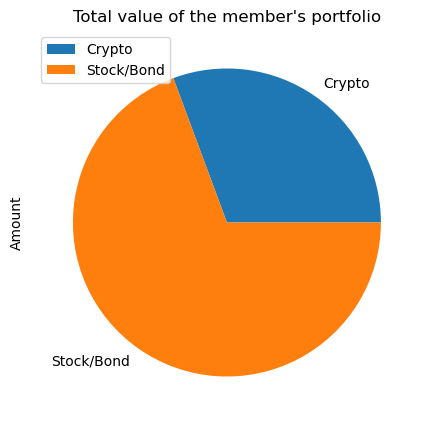

In [27]:
savings_df.plot.pie(title = "Total value of the member's portfolio", y="Amount", figsize= (10,5))

In [28]:
emergeny_fund_value = monthly_income * 3 

In [29]:
if total_portfolio > emergeny_fund_value:
    print("Congratulations! You're total saving portfolio is higher than your emergency funds amount")
elif total_portfolio == emergeny_fund_value:
    print("Congratulations! you're total saving portfolio amount has reached to your emergency funds amount") # congratulating the member on reaching this important financial goal.
else:
    print(f"You are {(emergeny_fund_value - total_portfolio)} away from getting to your emergency funds amount") 


Congratulations! You're total saving portfolio is higher than your emergency funds amount


Creating a Financial Planner for Retirment 

In [30]:
start_date = pd.Timestamp("2020-01-06", tz= "America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-06", tz= "America/New_York").isoformat()

portfolio_df = alpaca.get_bars(tickers, timeframe, start= start_date, end= end_date).df


# Reorganizind the Dataframe 
AGG = portfolio_df[portfolio_df["symbol"] == "AGG"].drop("symbol", axis = 1)
SPY = portfolio_df[portfolio_df["symbol"] == "SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([SPY, AGG], axis= 1, keys=["SPY","AGG"])


portfolio_df.head()


SPY                                    \
                               open    high     low   close    volume   
timestamp                                                               
2020-01-06 05:00:00+00:00  320.4900  323.73  320.36  323.73  55817168   
2020-01-07 05:00:00+00:00  323.0200  323.54  322.24  322.74  42874811   
2020-01-08 05:00:00+00:00  322.9400  325.78  322.67  324.42  68435753   
2020-01-09 05:00:00+00:00  326.1600  326.73  325.52  326.59  48582601   
2020-01-10 05:00:00+00:00  327.2899  327.46  325.20  325.64  53057389   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-01-06 05:00:00+00:00      255767  322.722391  113.13  113.13  112.840   
2020-01-07 05:00:00+00:00      226059  322.711069  112.92  112.92  112.780   
2020-01-08 05:00:00+00:00      340004  324.331733  112.85  112.94  112.545   
2020-01-09 05:00:00+00:00      242161  326.093557  112.49  112.79  112.460   
2020-01-10 05:00:00+00:00      236220  326.407649  112.90  112.99  112.820   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-01-06 05:00:00+00:00  112.92  8131608       17277  112.949600  
2020-01-07 05:00:00+00:00  112.80  2883005       11523  112.834953  
2020-01-08 05:00:00+00:00  112.67  7323117       12854  112.671650  
2020-01-09 05:00:00+00:00  112.79  9110852       13407  112.730232  
2020-01-10 05:00:00+00:00  112.98  4198053       11555  112.924604

In [31]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [32]:
mc_portfolio_30 = MCSimulation(portfolio_data= portfolio_df, weights=[.60,.40], num_simulation= 500, num_trading_days= 252 * 30 )

mc_portfolio_30.portfolio_data.head()

SPY                                    \
                               open    high     low   close    volume   
timestamp                                                               
2020-01-06 05:00:00+00:00  320.4900  323.73  320.36  323.73  55817168   
2020-01-07 05:00:00+00:00  323.0200  323.54  322.24  322.74  42874811   
2020-01-08 05:00:00+00:00  322.9400  325.78  322.67  324.42  68435753   
2020-01-09 05:00:00+00:00  326.1600  326.73  325.52  326.59  48582601   
2020-01-10 05:00:00+00:00  327.2899  327.46  325.20  325.64  53057389   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-01-06 05:00:00+00:00      255767  322.722391          NaN  113.13   
2020-01-07 05:00:00+00:00      226059  322.711069    -0.003058  112.92   
2020-01-08 05:00:00+00:00      340004  324.331733     0.005205  112.85   
2020-01-09 05:00:00+00:00      242161  326.093557     0.006689  112.49   
2020-01-10 05:00:00+00:00      236220  326.407649    -0.002909  112.90   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2020-01-06 05:00:00+00:00  113.13  112.840  112.92  8131608       17277   
2020-01-07 05:00:00+00:00  112.92  112.780  112.80  2883005       11523   
2020-01-08 05:00:00+00:00  112.94  112.545  112.67  7323117       12854   
2020-01-09 05:00:00+00:00  112.79  112.460  112.79  9110852       13407   
2020-01-10 05:00:00+00:00  112.99  112.820  112.98  4198053       11555   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-01-06 05:00:00+00:00  112.949600          NaN  
2020-01-07 05:00:00+00:00  112.834953    -0.001063  
2020-01-08 05:00:00+00:00  112.671650    -0.001152  
2020-01-09 05:00:00+00:00  112.730232     0.001065  
2020-01-10 05:00:00+00:00  112.924604     0.001685

In [33]:
mc_portfolio_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995451,0.998410,1.005548,1.003261,0.996185,0.989412,0.998216,0.998805,0.996789,1.005124,...,1.004690,0.983443,0.997263,0.986374,0.999516,1.000525,0.992710,0.997951,1.018412,1.014878
2,0.991570,0.998451,1.013056,1.033473,0.999204,0.993934,1.003633,0.994083,0.983271,0.994810,...,0.987075,0.993857,0.990990,0.976837,1.002405,1.006750,1.000987,0.992926,1.009014,1.013473
3,1.001722,0.995353,1.009948,1.028544,1.004242,0.994153,1.009737,0.994345,0.967329,0.984450,...,0.989144,1.010484,0.988498,0.966880,1.015612,1.007671,1.011160,0.990389,1.020074,1.022478
4,1.005429,0.995303,1.024474,1.018866,1.012288,0.992630,1.000260,0.989661,0.976665,0.993116,...,0.997354,1.007733,0.989747,0.961279,1.018360,1.023953,1.016989,0.987610,1.014592,1.024690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.653659,1.047258,1.145788,1.286060,2.114465,2.673054,1.047077,0.572100,5.691656,0.864351,...,4.999203,2.523887,3.359226,10.976081,0.948120,2.662164,1.159240,0.998461,2.720403,0.254689
7557,7.740359,1.035859,1.154815,1.283189,2.137640,2.679469,1.051782,0.576052,5.717951,0.858366,...,4.990983,2.533885,3.339417,11.032797,0.929634,2.666565,1.159699,0.983990,2.729278,0.259976
7558,7.742184,1.040783,1.142108,1.281456,2.119351,2.672187,1.041007,0.566725,5.557320,0.856786,...,4.966475,2.538923,3.314829,11.012555,0.924529,2.674621,1.135514,0.977186,2.731991,0.260275
7559,7.851198,1.043578,1.139222,1.273059,2.121567,2.647862,1.043080,0.566243,5.558121,0.864803,...,4.859945,2.561961,3.262871,11.098614,0.926814,2.674501,1.136878,0.976455,2.747949,0.258985


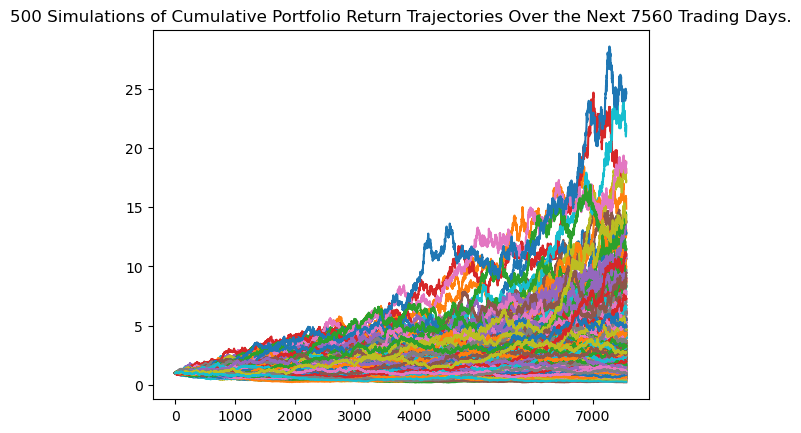

In [34]:
mc_line_plot_30 = mc_portfolio_30.plot_simulation()

mc_line_plot_30.get_figure().savefig("Monte_carlo_line_plot.png", bbox_inches = "tight")

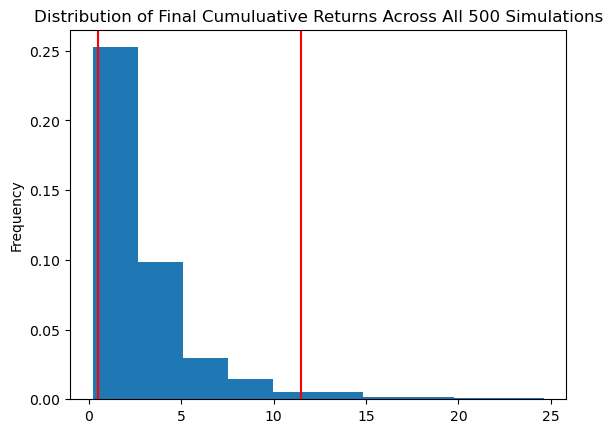

In [35]:
mc_dist_plot_30 = mc_portfolio_30.plot_distribution()

mc_dist_plot_30.get_figure().savefig("Monte_carlo_dist_plot.png", bbox_inches = "tight")

In [36]:
mc_summary_30 = mc_portfolio_30.summarize_cumulative_return()

mc_summary_30

count           500.000000
mean              3.041850
std               3.048668
min               0.213141
25%               1.233633
50%               2.060066
75%               3.630111
max              24.613025
95% CI Lower      0.476630
95% CI Upper     11.456490
Name: 7560, dtype: float64

In [37]:
print(total_stocks_bonds)

62506.799999999996


In [38]:
ci_lower_thirty_cumulative_return = mc_summary_30[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_summary_30[9] * total_stocks_bonds

print(f'There is a 95% chance that an initial investment of ${total_stocks_bonds:.2f} in the portfolio over the next 30 years will end within the range of ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f}.')

There is a 95% chance that an initial investment of $62506.80 in the portfolio over the next 30 years will end within the range of $29792.63 and $716108.51.


In [39]:
mc_portfolio_10 = MCSimulation(portfolio_data= portfolio_df, weights=[.80,.20], num_simulation= 500, num_trading_days= 252 * 10 )

mc_portfolio_10.portfolio_data.head()

SPY                                    \
                               open    high     low   close    volume   
timestamp                                                               
2020-01-06 05:00:00+00:00  320.4900  323.73  320.36  323.73  55817168   
2020-01-07 05:00:00+00:00  323.0200  323.54  322.24  322.74  42874811   
2020-01-08 05:00:00+00:00  322.9400  325.78  322.67  324.42  68435753   
2020-01-09 05:00:00+00:00  326.1600  326.73  325.52  326.59  48582601   
2020-01-10 05:00:00+00:00  327.2899  327.46  325.20  325.64  53057389   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-01-06 05:00:00+00:00      255767  322.722391          NaN  113.13   
2020-01-07 05:00:00+00:00      226059  322.711069    -0.003058  112.92   
2020-01-08 05:00:00+00:00      340004  324.331733     0.005205  112.85   
2020-01-09 05:00:00+00:00      242161  326.093557     0.006689  112.49   
2020-01-10 05:00:00+00:00      236220  326.407649    -0.002909  112.90   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2020-01-06 05:00:00+00:00  113.13  112.840  112.92  8131608       17277   
2020-01-07 05:00:00+00:00  112.92  112.780  112.80  2883005       11523   
2020-01-08 05:00:00+00:00  112.94  112.545  112.67  7323117       12854   
2020-01-09 05:00:00+00:00  112.79  112.460  112.79  9110852       13407   
2020-01-10 05:00:00+00:00  112.99  112.820  112.98  4198053       11555   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-01-06 05:00:00+00:00  112.949600          NaN  
2020-01-07 05:00:00+00:00  112.834953    -0.001063  
2020-01-08 05:00:00+00:00  112.671650    -0.001152  
2020-01-09 05:00:00+00:00  112.730232     0.001065  
2020-01-10 05:00:00+00:00  112.924604     0.001685

In [40]:
mc_portfolio_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008358,1.006107,1.006992,1.007559,0.992782,1.014326,0.993504,0.990241,1.006857,1.018437,...,0.999816,1.000429,1.003565,0.990390,0.998443,0.990286,0.993455,0.996315,1.010094,0.994428
2,1.006126,0.998905,1.010950,0.998596,1.002655,1.039125,0.995659,0.997179,0.999477,1.013445,...,1.008966,0.996675,1.007444,0.990783,1.015997,0.988201,0.973674,1.006336,0.974825,0.999911
3,1.006037,1.027101,1.002734,1.001034,1.004569,1.051474,0.989400,1.000347,0.982022,1.036521,...,1.009288,1.009772,0.999935,1.002487,1.029652,0.971097,0.964909,1.003279,0.981253,1.000685
4,1.006841,1.016367,1.008521,0.996106,0.997164,1.064056,1.016708,1.010806,0.997863,1.035637,...,1.010994,1.009901,0.981845,0.991285,1.028741,0.982001,0.966406,1.002220,0.969601,1.028155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.136671,7.931048,3.044284,4.235973,1.063055,6.875819,1.646456,2.253393,0.912958,2.656628,...,2.402257,0.802129,0.530197,1.652238,0.698103,0.805928,4.124937,0.854719,3.808203,0.725296
2517,2.083256,7.937901,3.050850,4.225267,1.051801,6.853161,1.627356,2.288006,0.917863,2.625174,...,2.394253,0.817077,0.529278,1.652983,0.694447,0.792836,4.215319,0.866183,3.767150,0.729252
2518,2.075880,8.054754,3.043888,4.164110,1.045013,6.804396,1.618196,2.272951,0.925450,2.618382,...,2.398066,0.818859,0.532107,1.635758,0.670993,0.803862,4.285080,0.871672,3.762642,0.737935
2519,2.026234,7.971090,3.115562,4.138880,1.036469,6.741264,1.588775,2.255970,0.933633,2.592072,...,2.355586,0.815081,0.529669,1.644172,0.672871,0.805611,4.247071,0.873666,3.701789,0.730196


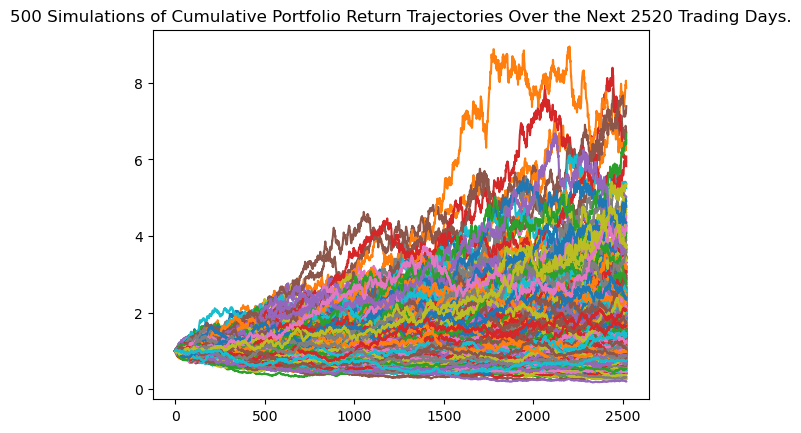

In [41]:
mc_line_plot_10 = mc_portfolio_10.plot_simulation()

mc_line_plot_10.get_figure().savefig("Monte_carlo_line_10_plot.png", bbox_inches = "tight")

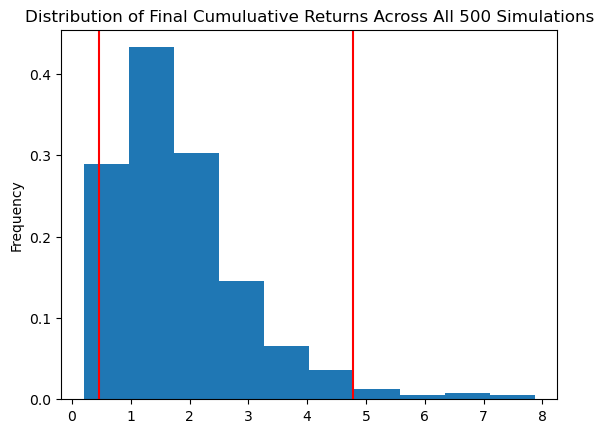

In [42]:
mc_dist_plot_10 = mc_portfolio_10.plot_distribution()

mc_dist_plot_10.get_figure().savefig("Monte_Carlo_dist_10_plot.png", bbox_inchec = "tight")

In [43]:
mc_summary_10 = mc_portfolio_10.summarize_cumulative_return()

mc_summary_10

count           500.000000
mean              1.861548
std               1.150156
min               0.202288
25%               1.021478
50%               1.582075
75%               2.381875
max               7.871690
95% CI Lower      0.460310
95% CI Upper      4.773799
Name: 2520, dtype: float64

In [44]:
print(total_stocks_bonds)

62506.799999999996


In [45]:
ci_lower_ten_cumulative_return = mc_summary_10[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_summary_10[9] * total_stocks_bonds

print(f'There is a 95% chance that an initial investment of ${total_stocks_bonds:.2f} in the portfolio over the next 30 years will end within the range of ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}.')

There is a 95% chance that an initial investment of $62506.80 in the portfolio over the next 30 years will end within the range of $28772.48 and $298394.89.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

The answer is no , the return after 30 years with 80%/20% invisted in stock can range from $28704.36 and $729453.02 , while the return after 10 years range from $32016.65 and $342498.20.